### Demand estimaction 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Business context: One of leading electricity Distribution Company would like to understand demand for electricity for 
the next 1-2 years to manage the production of electricity and managing the vendors for the same. It 
is one of the important exercises to getting accurate estimation of demand so that they can procure 
or produce the electricity as per the demand. 

* The data of monthly electricity consumption available starting from January 1973 to December 2019. 
We need to forecast the demand for next two years.
1. Date – Month & Year 
2. Electricity Consumption – Electricity consumption in Trillion Watts 

In [4]:
import os
print(os.getcwd())

C:\Users\ajays\Desktop\practice set\assignment\Demand Estimation


In [10]:
# import the Data

df=pd.read_csv(r'C:\Users\ajays\Desktop\practice set\assignment\Demand Estimation\Electricity Consumption.csv')
df.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [12]:
df.describe()

,Electricty_Consumption_in_TW
count,561.000000
mean,76.681764
std,22.756474
min,33.510700
25%,55.919700
50%,78.417000
75%,93.840600
max,123.216300


In [14]:
df['DATE']=pd.to_datetime(df.DATE,format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [15]:
df['month']=df.DATE.dt.month
df['year']=df.DATE.dt.year

#### Visualize the Data

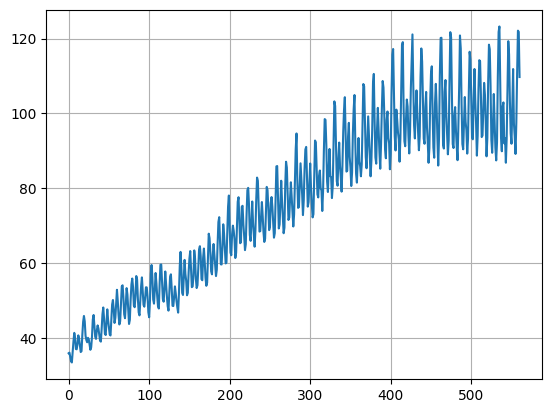

In [20]:
df['Electricty_Consumption_in_TW'].plot().grid()

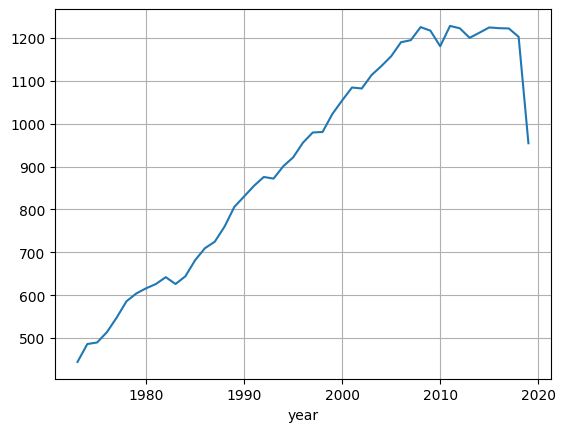

In [24]:
df.groupby('year')['Electricty_Consumption_in_TW'].sum().plot().grid()

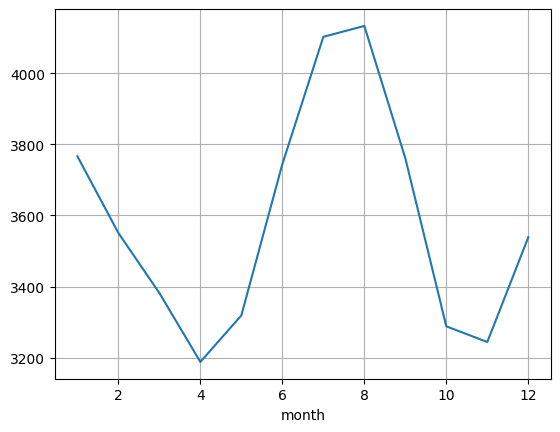

In [25]:
df.groupby('month')['Electricty_Consumption_in_TW'].sum().plot().grid()

In [27]:
tabel=pd.pivot_table(df,index='month',columns='year',values='Electricty_Consumption_in_TW')

Text(0.5, 1.0, 'consumption y_o_y')

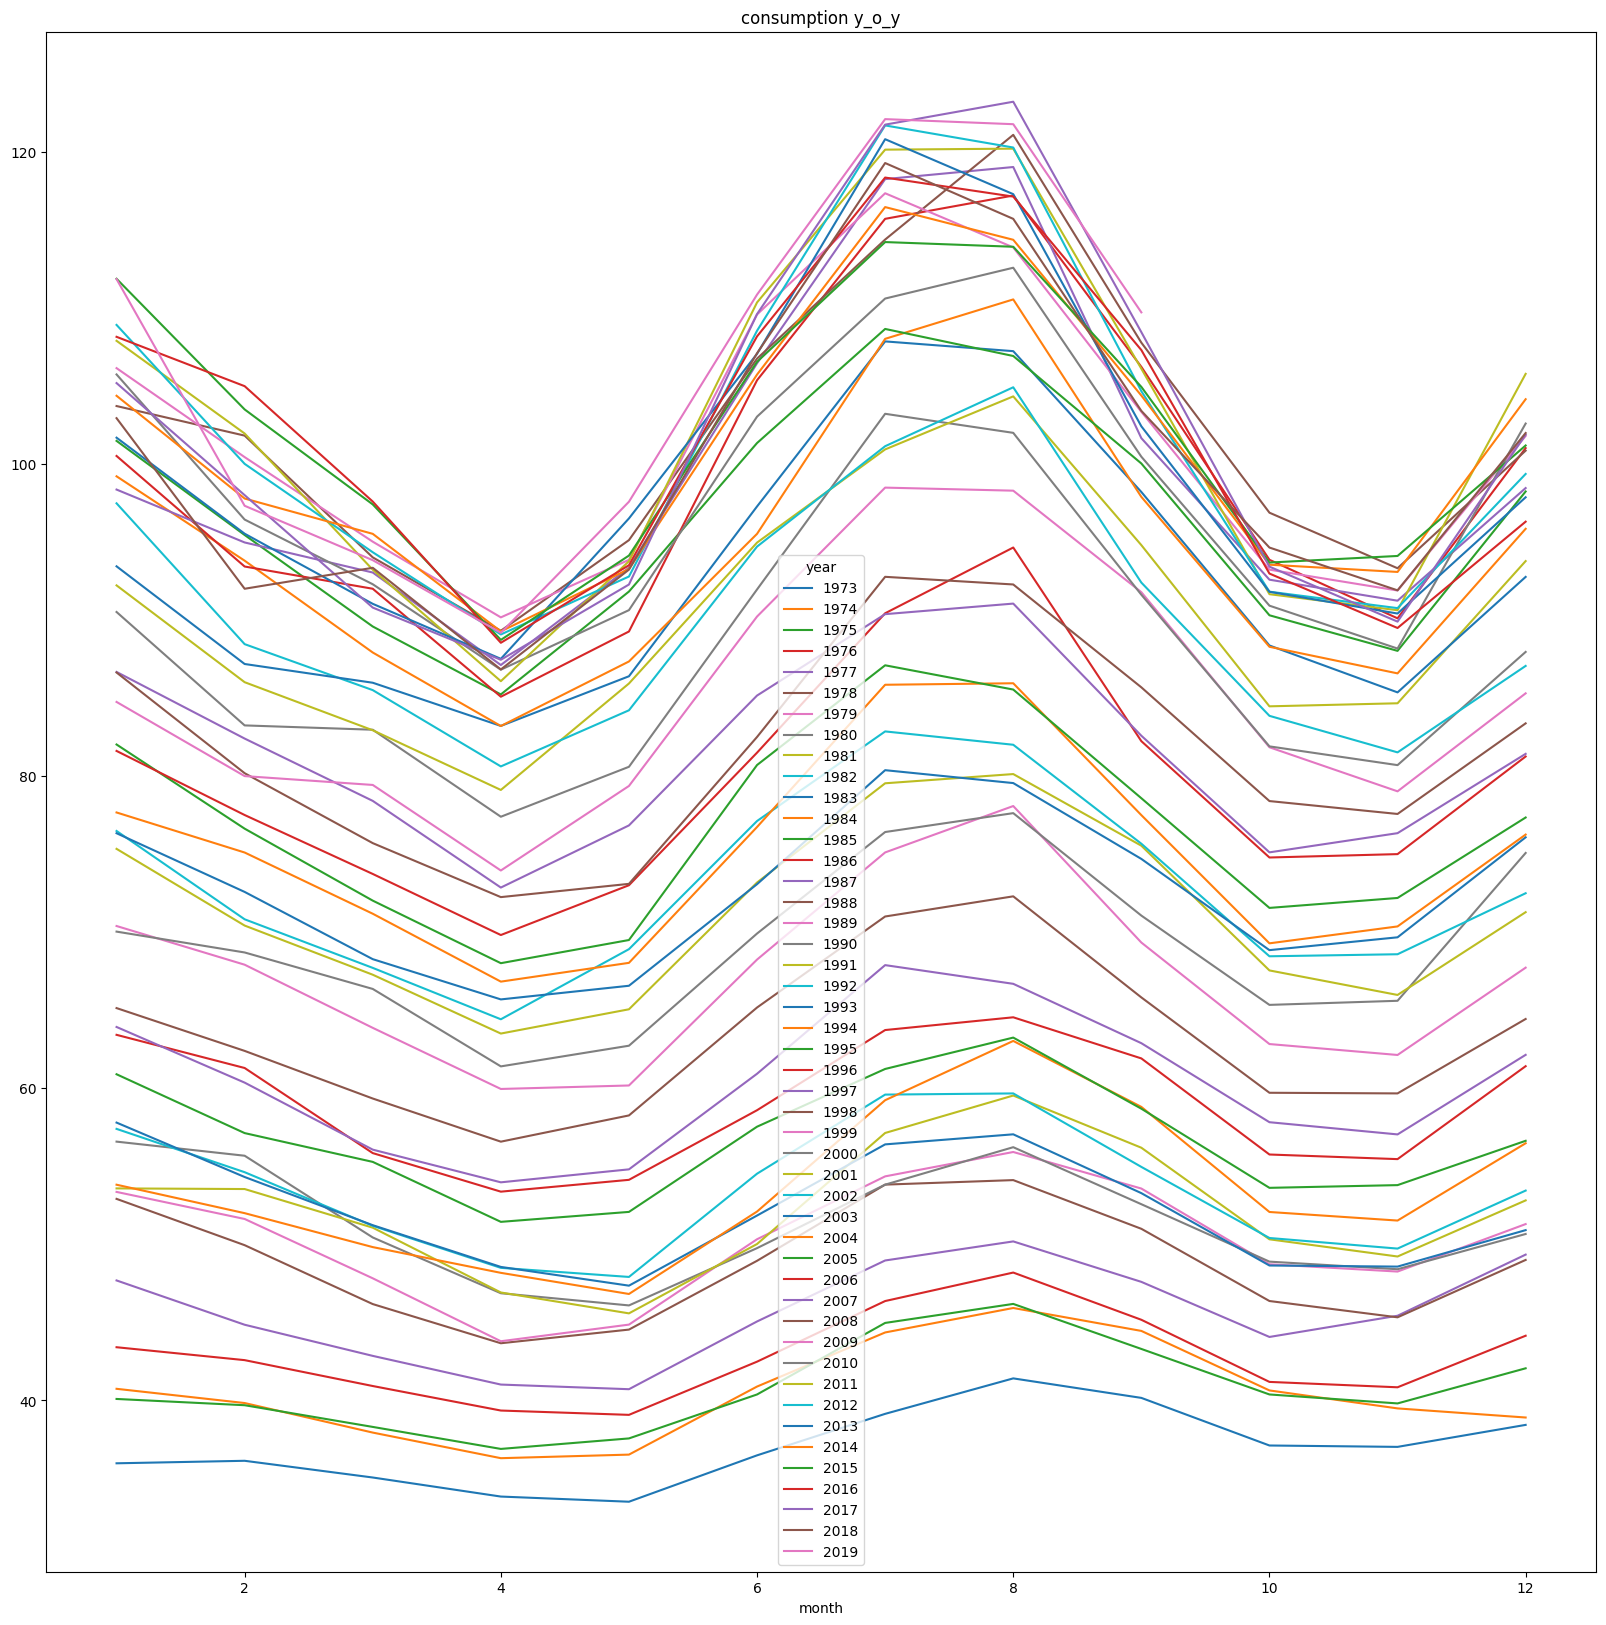

In [44]:
# plot the graph consumption y_o_y 
tabel.plot(figsize=(20,20))
plt.title('consumption y_o_y')

Text(0.5, 1.0, 'consumption_month_on_month')

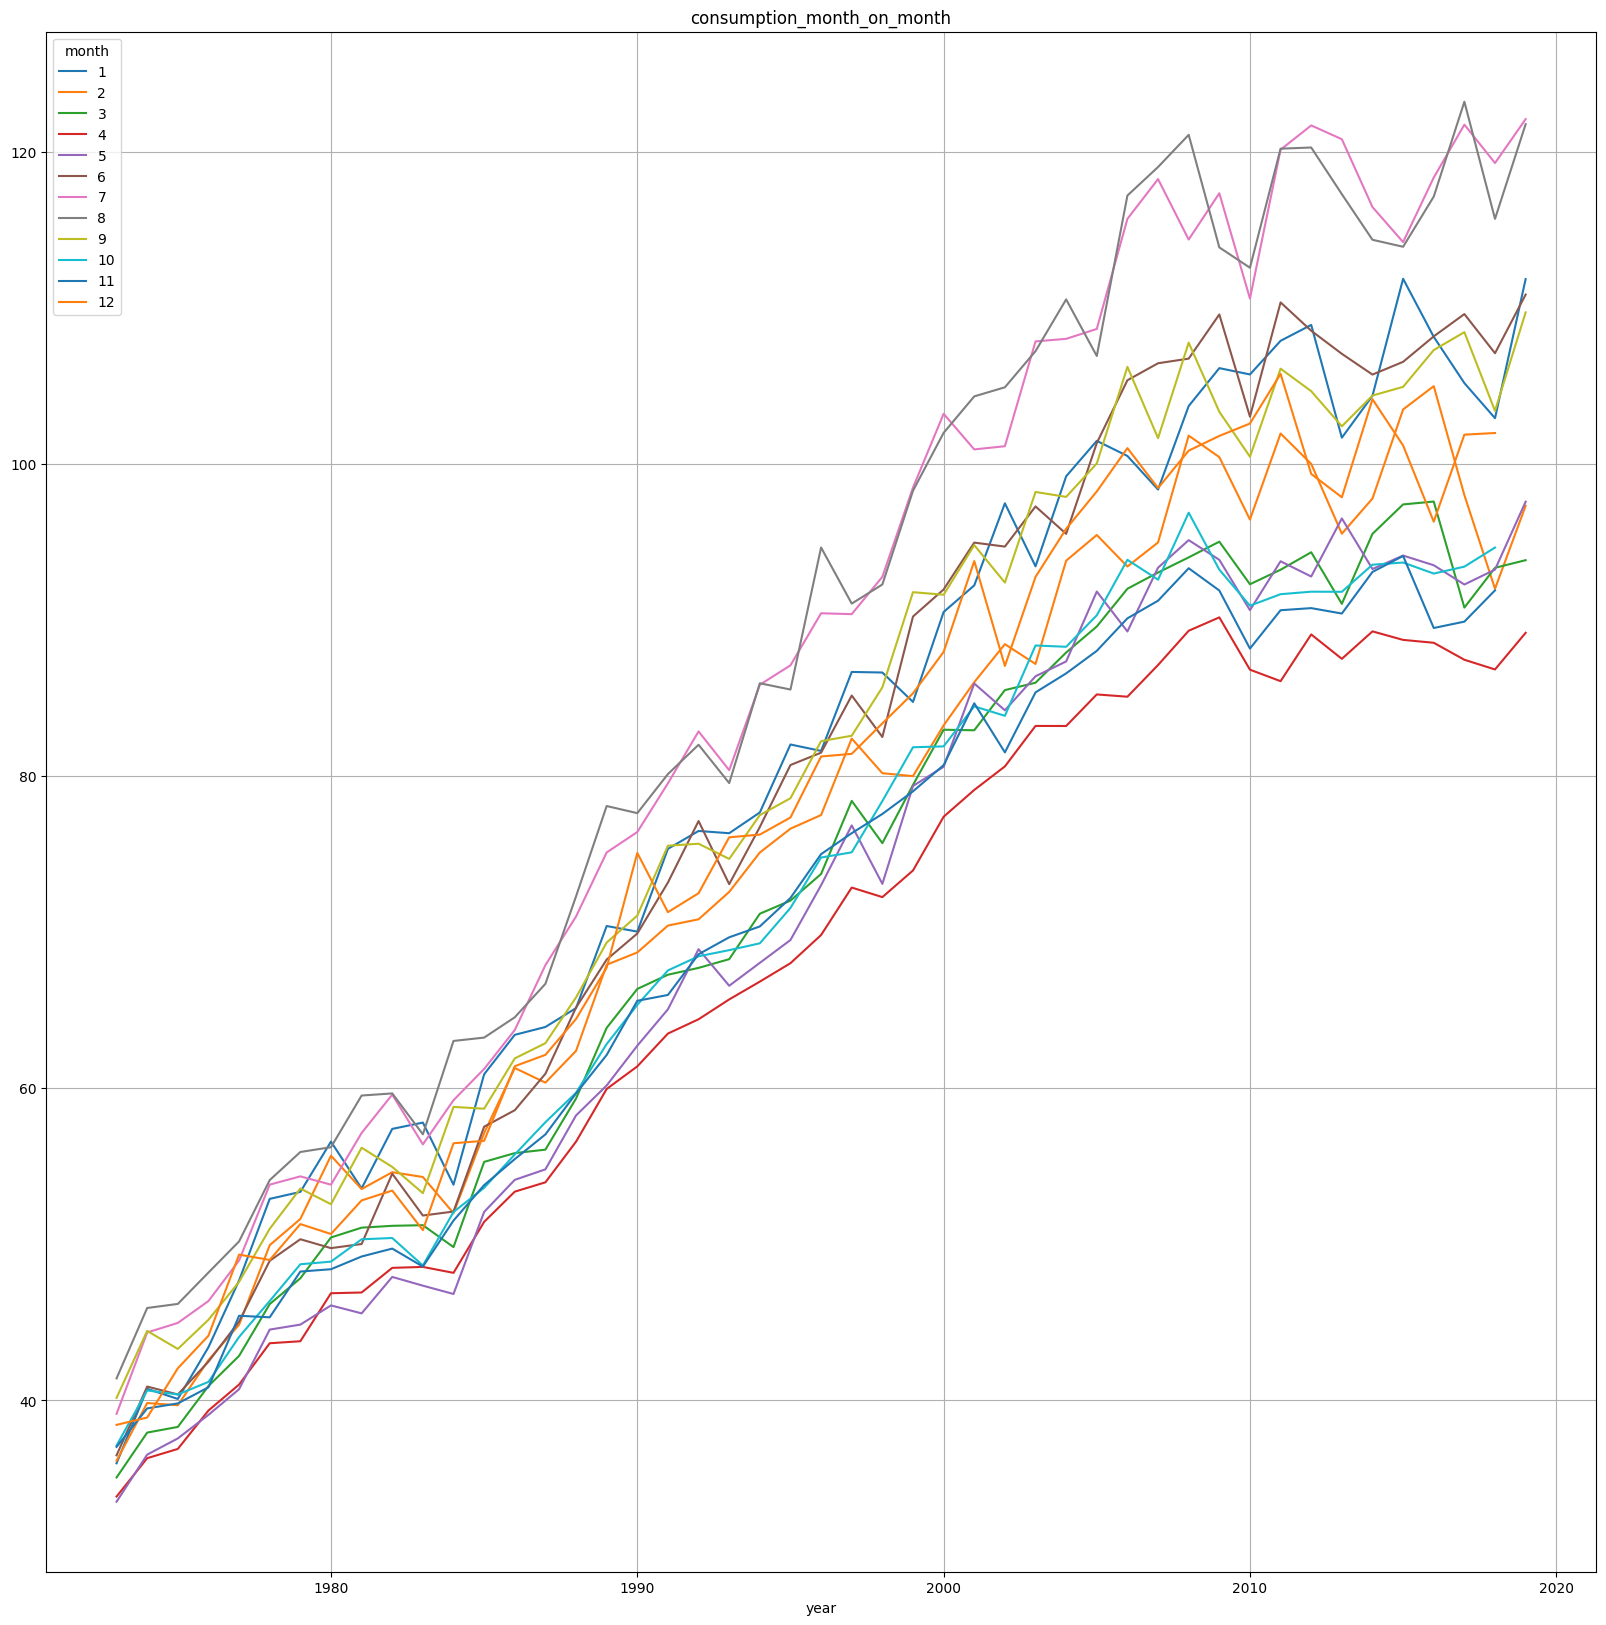

In [48]:
# plot the Graph for consuption month on month
pd.pivot_table(df,index='year',columns='month',values='Electricty_Consumption_in_TW').plot(figsize=(20,20)).grid()
plt.title('consumption_month_on_month')

In [50]:
ts=df['Electricty_Consumption_in_TW']
ts.index=df.DATE

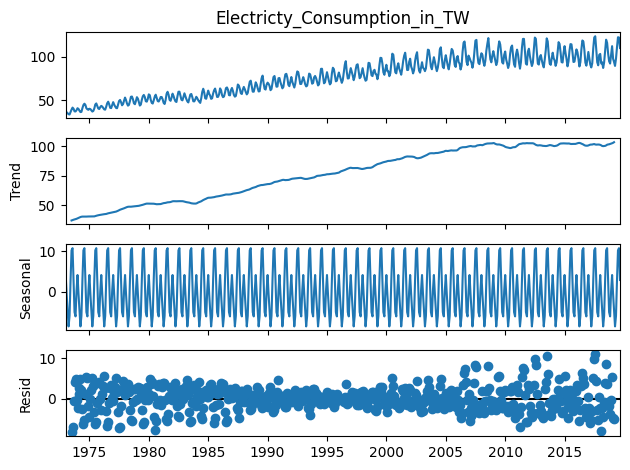

In [54]:
# Assuming the Data has a monthly frequency
from statsmodels.tsa.seasonal import seasonal_decompose
decom=seasonal_decompose(ts,model='additive')
decom.plot()
plt.show()

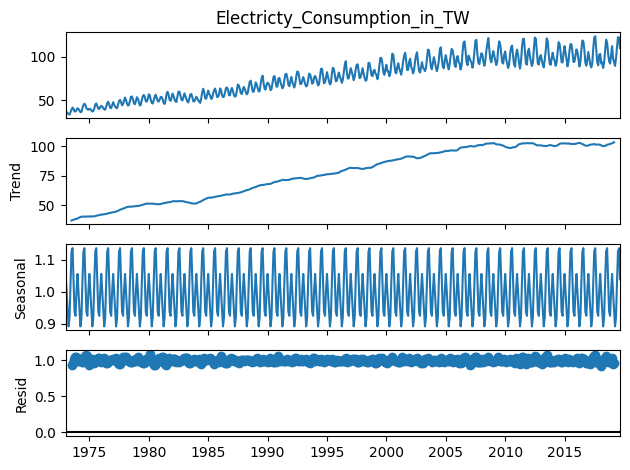

In [65]:
decom_m=seasonal_decompose(ts,model='multiplicative',period=12)
decom_m.plot()
plt.show()

In [77]:
pd.concat([decom_m.observed,decom_m.seasonal,decom_m.trend,decom_m.resid,decom_m.weights],axis=1).head(30)

,Electricty_Consumption_in_TW,seasonal,trend,resid,weights
DATE,,,,,
1973-01-01,35.9728,1.055358,NaN,NaN,1.0
1973-02-01,36.1334,0.996086,NaN,NaN,1.0
1973-03-01,35.0625,0.945337,NaN,NaN,1.0
1973-04-01,33.8416,0.890877,NaN,NaN,1.0
1973-05-01,33.5107,0.918780,NaN,NaN,1.0
1973-06-01,36.4823,1.030843,NaN,NaN,1.0
1973-07-01,39.1412,1.125749,37.223388,0.934064,1.0
1973-08-01,41.4137,1.136105,37.576442,0.970085,1.0
1973-09-01,40.1639,1.038776,37.850562,1.021507,1.0


In [106]:
from statsmodels.tsa.stattools import adfuller
def seasonility_check(x):
    a=adfuller(x)
    print("adf value:{} \n p_value:{} \n usedlog:{} \n nobs:{} \n critical_value:{} \n icbest:{}"
          .format(a[0],a[1],a[2],a[3],a[4],a[5]))

In [107]:
seasonility_check(ts)

adf value:-1.7405933729832515 
 p_value:0.4103281604468643 
 usedlog:15 
 nobs:545 
 critical_value:{'1%': -3.442405720052601, '5%': -2.866857804790472, '10%': -2.5696022094099824} 
 icbest:2295.409663118043


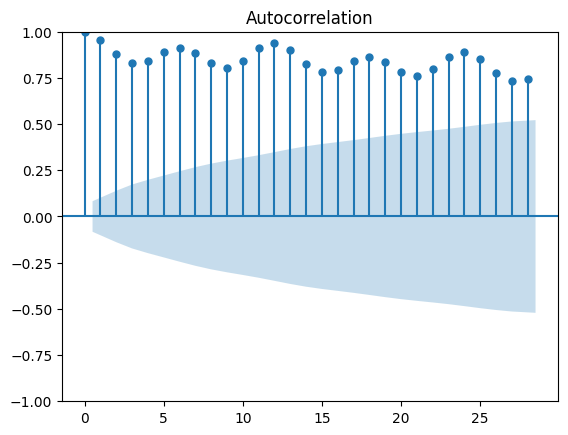

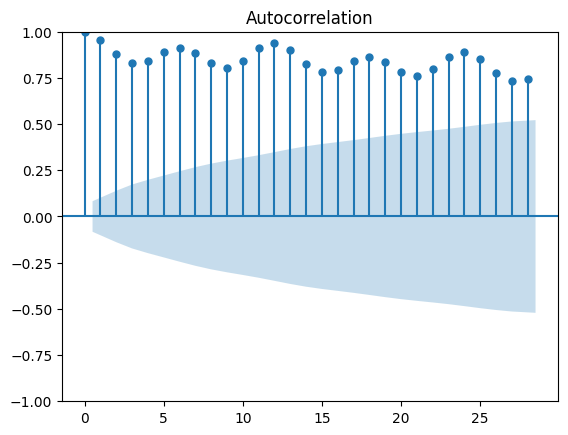

In [108]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.tsa.api as smt

smt.graphics.plot_acf(ts)

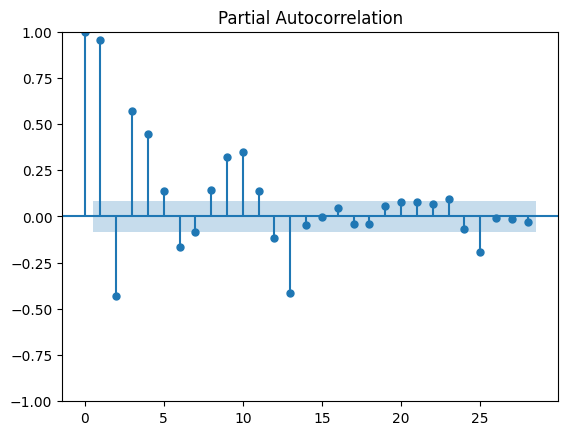

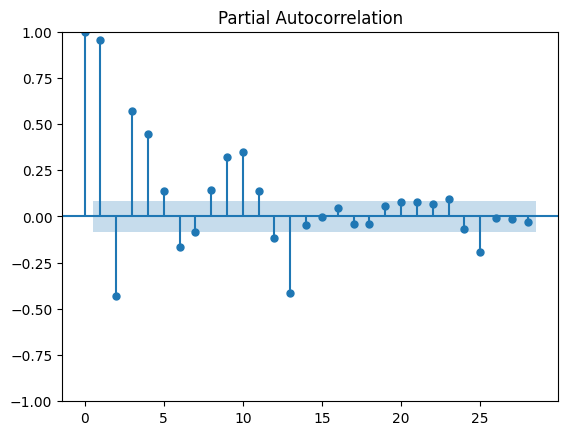

In [111]:
smt.graphics.plot_pacf(ts)

In [112]:
# p_value is less greater than critical value 
# the chart shown that the series is not stationary
ts_ln=np.log(ts)
seasonility_check(ts_ln)

adf value:-3.0018666788915795 
 p_value:0.0347204433006547 
 usedlog:15 
 nobs:545 
 critical_value:{'1%': -3.442405720052601, '5%': -2.866857804790472, '10%': -2.5696022094099824} 
 icbest:-2515.6635118596973


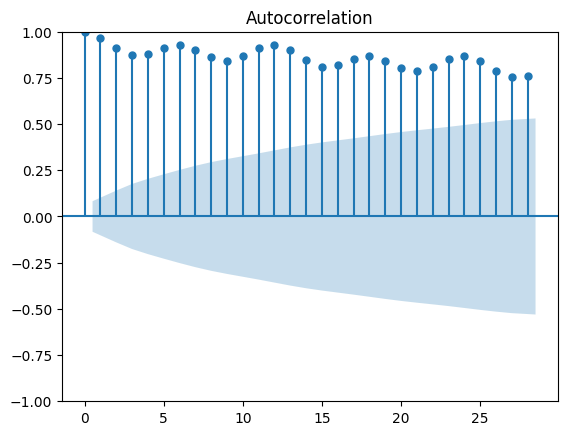

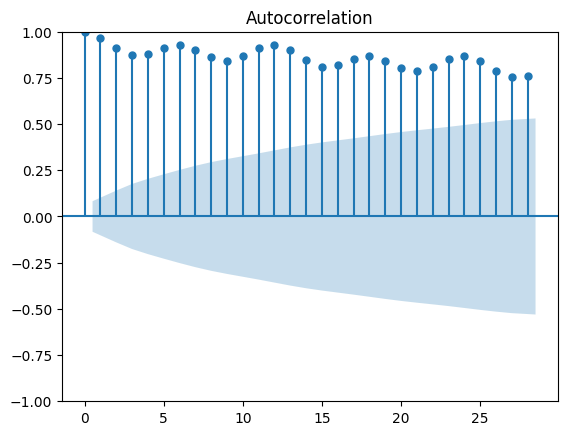

In [119]:
smt.graphics.plot_acf(ts_ln)

## makeing stationary

In [142]:
# in this graph plot we can see that acf chart seasionality not removed but the adf test shown that seasionality removed
# now useing difference

ts_diff=ts.diff().dropna()
adfuller(ts_diff)

(-7.941665363981163,
 3.3013438021518788e-12,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2292.555416618966)

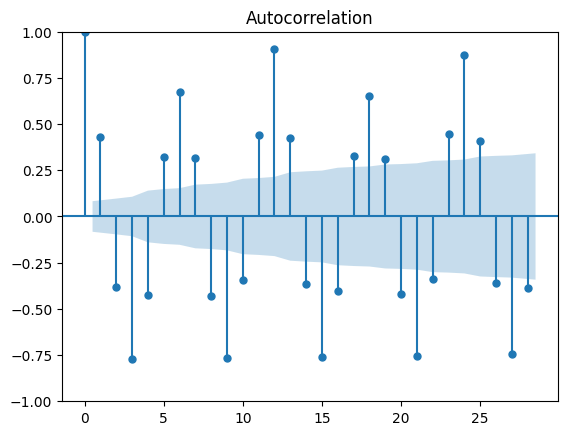

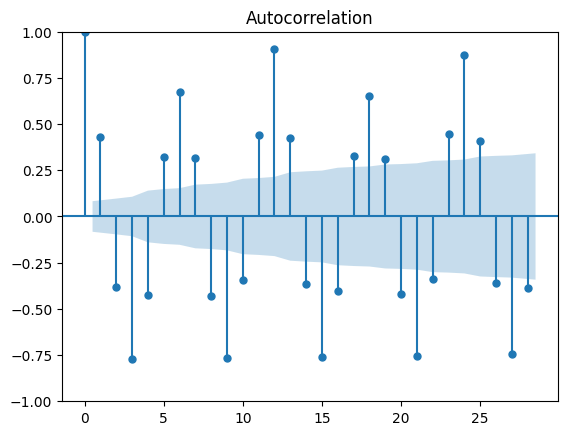

In [143]:
smt.graphics.plot_acf(ts_diff)

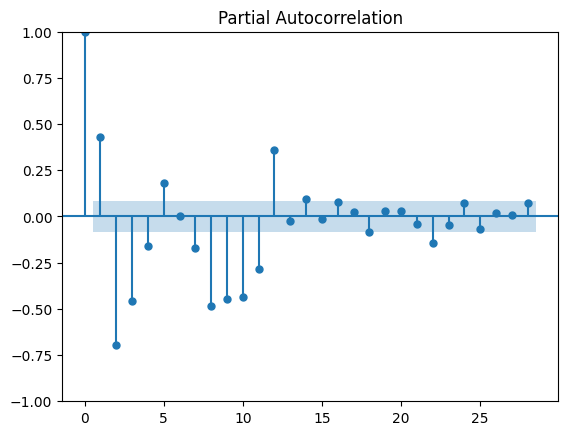

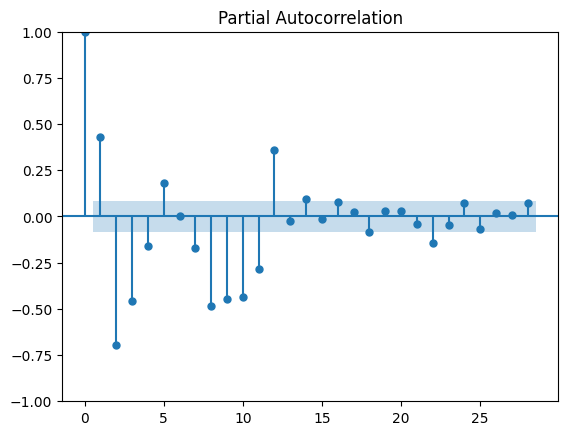

In [144]:
smt.graphics.plot_pacf(ts_diff)

<Axes: xlabel='DATE'>

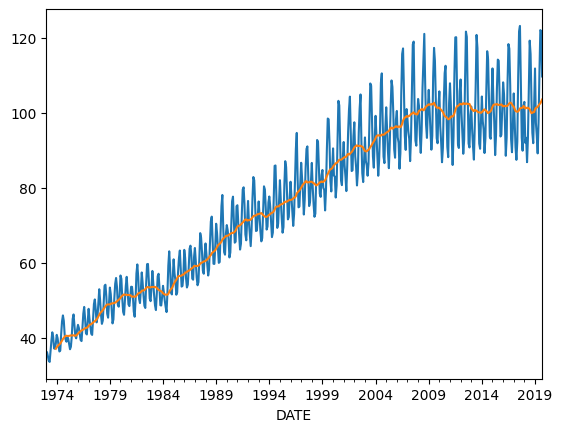

In [145]:
# for the current plot and adfuller test we can see that the series is stationary

ts.plot()
ts.rolling(12).mean().plot()

<Axes: xlabel='DATE'>

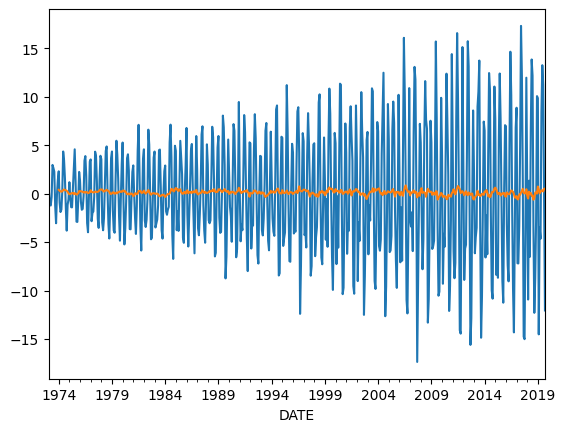

In [146]:
# this graph shown that seies is stationary
ts_diff.plot()
ts_diff.rolling(12).mean().plot()

## Creating the Model useing Sarima

Sarima Model

* ,1,12)
p: Order of the non-seasonal autoregressive (AR
* d: Degree of non-seasonal differencing(1) or no of time the data need to be differenced to make stationary .
* ionary .
q: Order of the non-seasonal moving average (MA) model. or q value found based after which value of lag the co

relations becoming zero or crossing in the pacf plot zero (positive to negative or negative to
 * positive)
P: Order of the seasonal autoregressive (S* AR) model.
D: Degree of seasonal di* fferencing.
Q: Order of the seasonal moving average * ( SMA) model.
s/t: The number of observations per seasonal cycle (e.g., 12 for monthly data)

In [149]:
ts_ln.tail(10)

DATE
2018-12-01    4.624858
2019-01-01    4.717177
2019-02-01    4.578067
2019-03-01    4.541598
2019-04-01    4.490739
2019-05-01    4.580734
2019-06-01    4.708250
2019-07-01    4.804852
2019-08-01    4.802187
2019-09-01    4.697923
Name: Electricty_Consumption_in_TW, dtype: float64

In [150]:
train=ts_ln[:'2019-01-01']
test=ts_ln['2019-02-01':]

<Axes: xlabel='DATE'>

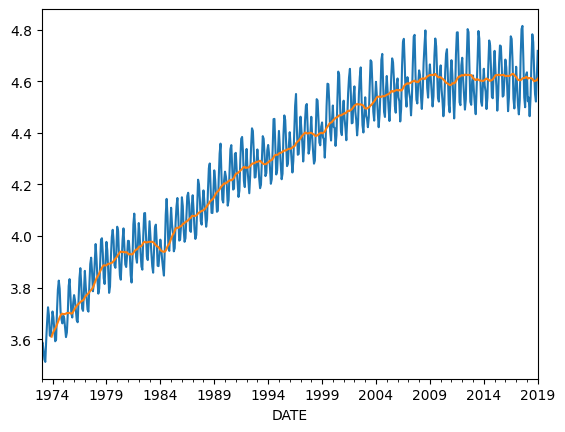

In [155]:
train.plot()
train.rolling(12).mean().plot()

In [163]:
model=sm.tsa.statespace.SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),enforce_stationarity=False,enforce_invertibility=False).fit()
model.summary()

C:\Users\ajays\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ajays\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  553
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                1319.609
Date:                            Thu, 30 Jan 2025   AIC                          -2629.219
Time:                                    22:20:14   BIC                          -2607.779
Sample:                                01-01-1973   HQIC                         -2620.833
                                     - 01-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6234      0.055     11.388      0.000       0.516       0.731
ma.L1         -0.8935      0.034    -26.209      0.000      -0.960      -0.827
ar.S.L12       1.0076      0.003    370.338      0.000       1.002       1.013
ma.S.L12      -0.8241      0.028    -29.379      0.000      -0.879      -0.769
sigma2         0.0004   2.56e-05     16.458      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.28   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.26   Prob(JB):                         0.41
Heteroskedasticity (H):               1.27   Skew:                             0.13
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [178]:
f_cast=np.exp(model.forecast(8))
act=np.exp(test)

In [180]:
print('test_error:',np.mean(np.abs(act-f_cast)/act))

test_error: 0.020767650299279


In [182]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,mean_squared_error
mean_absolute_percentage_error(f_cast,act)

0.020495362988168946

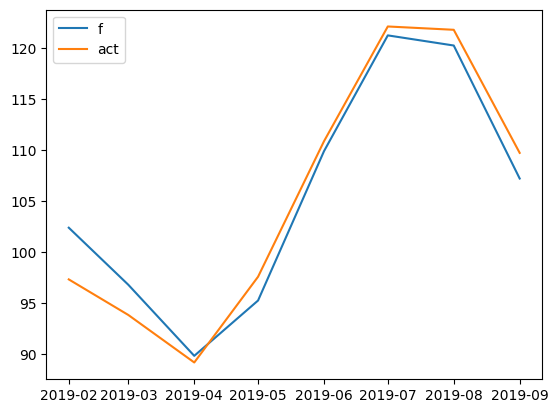

In [189]:
plt.plot(f_cast,label='f')
plt.plot(act,label='act')
plt.legend()

In [205]:
import sys
import itertools
import warnings

def auto_arima(timeseries,regressors=None,p=range(0,2),d=range(0,2),q=range(0,2),
               P=range(0,2),D=range(0,2),Q=range(0,2)):
    pdq=list(itertools.product(p,d,q))

    seasonal_pdq=[(x[0],x[1],x[2],12) for x in list (itertools.product(P,D,Q))]
    warnings.filterwarnings('ignore')
    
    best_aic=np.inf
    best_pdq=None
    best_seasonal_pdq=None
    best_results=None

    for param in pdq:
        for seasonal_param in seasonal_pdq:
            try:
                temp_model=sm.tsa.statespace.SARIMAX(endog=timeseries,exog=regressors,
                                                     order=param,seasonal_order=seasonal_param,
                                                     enforce_stationarity=False,enforce_invertibility=False)
                temp_results=temp_model.fit()
                print('SARIMAX{}x{}12 model-AIC:{}'.format(param,seasonal_param,temp_results.aic))

                if temp_results.aic<best_aic:
                    best_aic=temp_results.aic
                    best_pdq=param
                    best_seasonal_pdq=seasonal_param
                    best_results=temp_results
            except:
                continue
    print('\n Best SARIMAX{}x{}12 model_AIC:{}'.format(best_pdq,best_seasonal_pdq,best_aic))
    print('\n')
    print(best_results.summary().tables[0])
    #print(best_results.summary().tables[1])
    #return best_results

In [207]:
best_result=auto_arima(train,p=range(1,3),d=range(1,3),q=range(1,3),
                      P=range(1,3),D=range(0,2),Q=range(0,2))

SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 model-AIC:-1412.1276018759456
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 model-AIC:-1760.5747717084548
SARIMAX(1, 1, 0)x(0, 0, 2, 12)12 model-AIC:-1875.7752208260627
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 model-AIC:-2351.577565217493
SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 model-AIC:-2520.3564274371292
SARIMAX(1, 1, 0)x(0, 1, 2, 12)12 model-AIC:-2461.0462563774754
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 model-AIC:-2360.718907604176
SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 model-AIC:-2582.1443098146765
SARIMAX(1, 1, 0)x(1, 0, 2, 12)12 model-AIC:-2520.052451249284
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 model-AIC:-2387.302249677543
SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 model-AIC:-2512.439443339318
SARIMAX(1, 1, 0)x(1, 1, 2, 12)12 model-AIC:-2459.483208612716
SARIMAX(1, 1, 0)x(2, 0, 0, 12)12 model-AIC:-2387.6790798217426
SARIMAX(1, 1, 0)x(2, 0, 1, 12)12 model-AIC:-2518.8781495902163
SARIMAX(1, 1, 0)x(2, 0, 2, 12)12 model-AIC:-2523.8440240863238
SARIMAX(1, 1, 0)x(2, 1, 0, 12)12 model-AIC:-2395.819809852632

In [210]:
# from this the best model is

model=sm.tsa.statespace.SARIMAX(train,order=(2,1,1),seasonal_order=(1,0,1,12),
                                enforce_stationarity=False,enforce_invertibility=False).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  553
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                1321.868
Date:                            Fri, 31 Jan 2025   AIC                          -2631.737
Time:                                    00:26:22   BIC                          -2606.010
Sample:                                01-01-1973   HQIC                         -2621.673
                                     - 01-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6405      0.057     11.232      0.000       0.529       0.752
ar.L2         -0.1149      0.050     -2.286      0.022      -0.213      -0.016
ma.L1         -0.8511      0.044    -19.544      0.000      -0.936      -0.766
ar.S.L12       1.0075      0.003    350.466      0.000       1.002       1.013
ma.S.L12      -0.8296      0.027    -30.611      0.000      -0.883      -0.776
sigma2         0.0004   2.53e-05     16.516      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.06
Prob(Q):                              0.92   Prob(JB):                         0.36
Heteroskedasticity (H):               1.32   Skew:                             0.12
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [213]:
f_cast=np.exp(model.forecast(8))
act=np.exp(test)

print('test_error:',np.mean(np.abs(act-f_cast)/act))

test_error: 0.02094890800202248


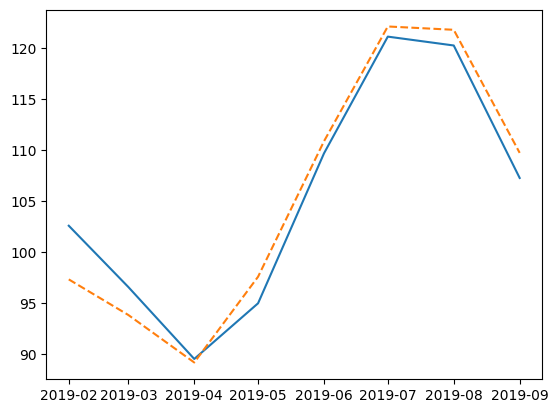

In [214]:
plt.plot(f_cast,label='cast')
plt.plot(act,'--',label='act')

In [215]:
mean_absolute_percentage_error(f_cast,act)

0.020696010163632896

In [216]:
# forecasting 
f_new_cast=np.exp(model.forecast(32))
f_new_cast

2019-02-01    102.582687
2019-03-01     96.579817
2019-04-01     89.533471
2019-05-01     94.984394
2019-06-01    109.674070
2019-07-01    121.107715
2019-08-01    120.239332
2019-09-01    107.260270
2019-10-01     94.885095
2019-11-01     92.712684
2019-12-01    102.933199
2020-01-01    109.157431
2020-02-01    101.118043
2020-03-01     96.187723
2020-04-01     89.626063
2020-05-01     95.352993
2020-06-01    110.316054
2020-07-01    121.942821
2020-08-01    121.072115
2020-09-01    107.912706
2020-10-01     95.374675
2020-11-01     93.174825
2020-12-01    103.527579
2021-01-01    109.836179
2021-02-01    101.688299
2021-03-01     96.693833
2021-04-01     90.049811
2021-05-01     95.848430
2021-06-01    111.010793
2021-07-01    122.803237
2021-08-01    121.919821
2021-09-01    108.574333
Freq: MS, Name: predicted_mean, dtype: float64

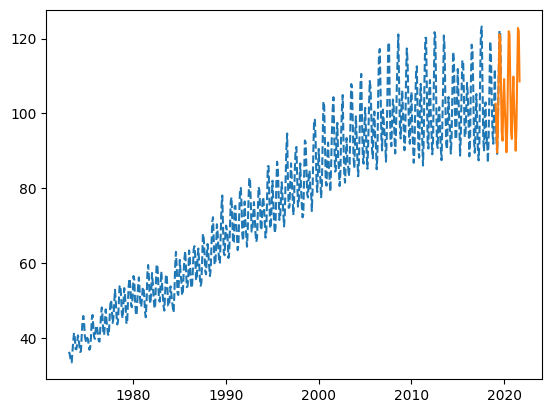

In [217]:
# plot the graph
plt.plot(ts,'--',label='act')
plt.plot(f_new_cast,label='f_cast')